<a href="https://colab.research.google.com/github/orgdoc/model_adaptive_rationality/blob/master/Session1Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd #for data structure and data analysis
import statsmodels.api as sm #for statistical analysis
from scipy import stats #for statistical analysis & machine learning
from scipy.stats.mstats import zscore #to standardize regression coefficients
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df) #to standardize regression coefficients
import matplotlib.pyplot as plt #to plot
import numpy as np #to handle arrays and matrixes
# packages and functions for plotting correlation
import seaborn as sns #to plot
import matplotlib.pyplot as plt #to plot
import numpy as np #to handle arrays and matrixes

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [0]:
def plotCorr(corr):
    sns.set(style="white")
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))
    
    # Generate a custom diverging colormap
    # sns.palplot(sns.diverging_palette(240, 0)) Uncomment to try out different color palettes to use below
    cmap = sns.diverging_palette(240, 0, as_cmap=True)
    
    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.15,vmin=-0.15,  # vmax and vmin define the upper and lower boundaries of the colormap respectively
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [0]:
def plotCoef(model):
    err_series = model.params - model.conf_int()[0]
    coef_df = pd.DataFrame({'coef': model.params.values[1:],
                            'err': err_series.values[1:],
                            'varname': err_series.index.values[1:]
                           })
    fig, ax = plt.subplots(figsize=(8, 5))
    coef_df.plot(x='varname', y='coef', kind='bar', 
                 ax=ax, color='none', 
                 yerr='err', legend=False)
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
               marker='s', s=120, 
               y=coef_df['coef'], color='black')
    ax.axhline(y=0, linestyle='--', color='black', linewidth=4)
    ax.xaxis.set_ticks_position('none')
    

In [8]:
from google.colab import files
uploaded = files.upload()

Saving chimeraCSV.csv to chimeraCSV.csv


In [0]:
import io
df = pd.read_csv(io.BytesIO(uploaded['chimeraCSV.csv']))

In [0]:
summaryStats = df.describe()

In [15]:
tstat = sm.stats.ttest_ind(df[df.gender==0].exit,df[df.gender==1].exit)[0] 
pvalue = sm.stats.ttest_ind(df[df.gender==0].exit,df[df.gender==1].exit)[1] 
print('the tstat for gender differences in exit (female-male) is ='+ str(tstat))
print('the pvalue is ='+ str(pvalue))

the tstat for gender differences in exit (female-male) is =1.4717646026099307
the pvalue is =0.14110181255942428


In [18]:
#Are exiters higher paid?
tstat = sm.stats.ttest_ind(df[df.exit==0].salary,df[df.exit==1].salary)[0]
pvalue =  sm.stats.ttest_ind(df[df.exit==0].salary,df[df.exit==1].salary)[1]
print('the tstat for salary differences in exit (stay-exit) is ='+ str(tstat))
print('the pvalue is ='+ str(pvalue))


the tstat for salary differences in exit (stay-exit) is =12.04907734005799
the pvalue is =2.629245415930719e-33


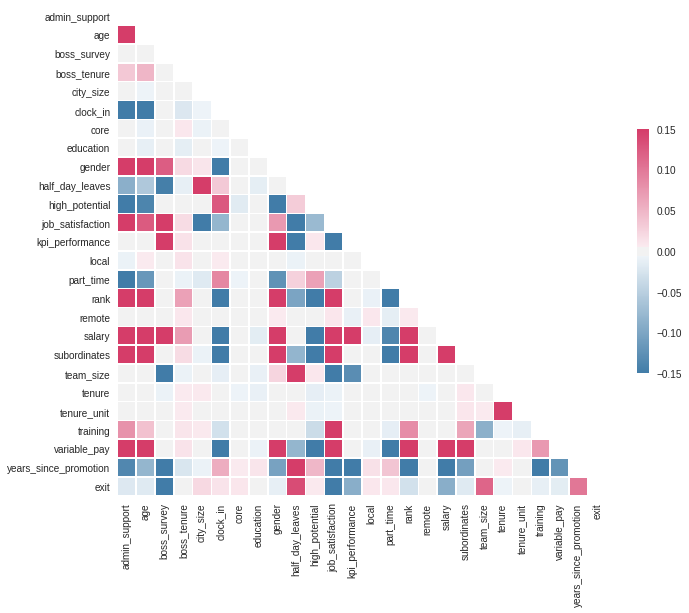

In [19]:
correlationMatrix = df.corr(method='pearson', min_periods=1)
plotCorr(correlationMatrix)

In [0]:
X = df[["admin_support", "age","boss_survey","boss_tenure","city_size","clock_in","core","education","gender","half_day_leaves","high_potential","job_satisfaction","kpi_performance","local","part_time","rank","remote","salary","subordinates","team_size","tenure","tenure_unit","training","variable_pay","years_since_promotion"]]
y = df["exit"]

#rename columns for printing results
X_std = pd.DataFrame(data=zscore(X),
                     columns=["admin_support", "age","boss_survey","boss_tenure","city_size","clock_in","core","education","gender","half_day_leaves","high_potential","job_satisfaction","kpi_performance","local","part_time","rank","remote","salary","subordinates","team_size","tenure","tenure_unit","training","variable_pay","years_since_promotion"])
# add constant to the model
X_std = sm.add_constant(X_std)  # When X is list as in the tip above, this one does not work.


                            OLS Regression Results                            
Dep. Variable:                   exit   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     147.0
Date:                Sun, 14 Apr 2019   Prob (F-statistic):               0.00
Time:                        09:39:18   Log-Likelihood:                -4612.2
No. Observations:               18132   AIC:                             9276.
Df Residuals:                   18106   BIC:                             9479.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.13

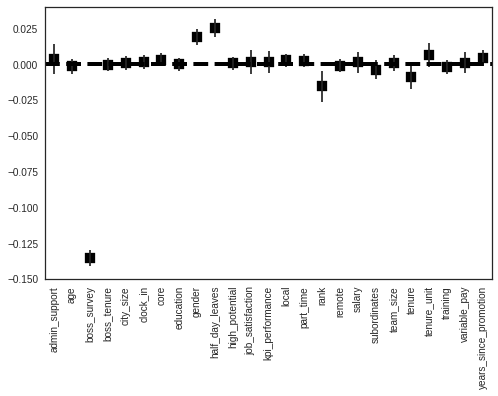

In [21]:
# fit an OLS model
model = sm.OLS(y,X_std).fit() 
plotCoef(model)
modelSummary = model.summary()
print (modelSummary)

Optimization terminated successfully.
         Current function value: 0.302018
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                   exit   No. Observations:                18132
Model:                          Logit   Df Residuals:                    18106
Method:                           MLE   Df Model:                           25
Date:                Sun, 14 Apr 2019   Pseudo R-squ.:                  0.2387
Time:                        09:39:48   Log-Likelihood:                -5476.2
converged:                       True   LL-Null:                       -7193.4
                                        LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -2.5565      0.035    -73.566      0.000      -2.625      -2.

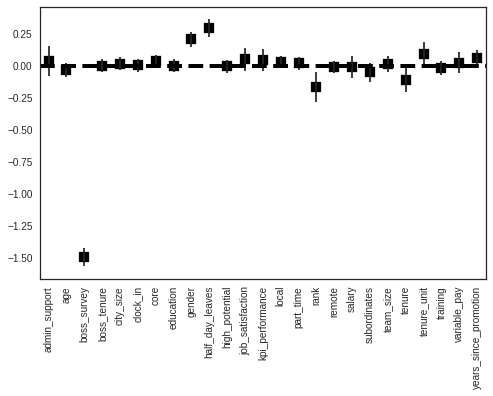

In [22]:
# Step 7: Multivariate analysis: logit model
model_logit = sm.Logit(endog=y, exog=X_std).fit()
model_logitSummary= model_logit.summary() 
plotCoef(model_logit)
print (model_logitSummary)

                            OLS Regression Results                            
Dep. Variable:        kpi_performance   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     1440.
Date:                Sun, 14 Apr 2019   Prob (F-statistic):               0.00
Time:                        09:40:13   Log-Likelihood:                 25701.
No. Observations:               18132   AIC:                        -5.135e+04
Df Residuals:                   18107   BIC:                        -5.116e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.70

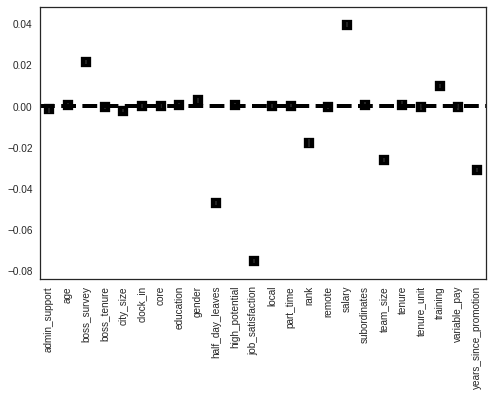

In [23]:
# Step 8: Optional HW from Session1
#Re-run the OLS model with KPI-performance as the dependent variable
#Compare what you get with the results for exit 
X = df[["admin_support", "age","boss_survey","boss_tenure","city_size","clock_in","core","education","gender","half_day_leaves","high_potential","job_satisfaction","local","part_time","rank","remote","salary","subordinates","team_size","tenure","tenure_unit","training","variable_pay","years_since_promotion"]]
y = df["kpi_performance"]

#rename columns for printing results
X_std = pd.DataFrame(data=zscore(X),
                     columns=["admin_support", "age","boss_survey","boss_tenure","city_size","clock_in","core","education","gender","half_day_leaves","high_potential","job_satisfaction","local","part_time","rank","remote","salary","subordinates","team_size","tenure","tenure_unit","training","variable_pay","years_since_promotion"])
# add constant to the model
X_std = sm.add_constant(X_std)  # When X is list as in the tip above, this one does not work.


# fit an OLS model
model = sm.OLS(y,X_std).fit() 
plotCoef(model)
modelSummary = model.summary()
print (modelSummary)
